In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = 1

In [3]:
fFD =  1./(2.*h*h)
fPD =  1./(8.*h/2*h/2)

In [4]:
M = np.zeros([18,18])

In [5]:
M [0][0] = 1

In [6]:
M [1][0] = -2 * fFD
M [1][1] = 4 * fFD
M [1][2] = -2 * fFD

In [7]:
M [2][1] = -2 * fFD
M [2][2] = 4 * fFD
M [2][3] = -2 * fFD

Match the displacement $u_3$ and $u_6$

In [8]:
M [3][3] = -1
M [3][6] = 1

Match the displacement $u_4$ and $u_2$

In [9]:
M [4][4] = -1
M [4][2] = 1

Interpolate the displacement $u_5$ and $u_5'$

* $u_5'-u_5=0$
* $\frac{1}{2}\left(u_2 + u_3\right)-u_5=0$

In [66]:
M [5][5] = -1
M [5][2] = 1/2
M [5][3] = 1/2

Apply the non-local model

In [11]:
for i in range(6,12):
    M[i][i-2] = -1.  * fPD
    M[i][i-1] = -4. * fPD
    M[i][i] = 10. * fPD
    M[i][i+1] =  -4. * fPD
    M[i][i+2] = -1. * fPD

Interpolate the displacement $u_5$ and $u_5'$

In [12]:
M [12][12] = -1
M [12][14] = 1/2
M [12][15] = 1/2

Match the displacement $u_{13}$ and $u_{15}$

In [13]:
M [13][13] = -1
M [13][15] = 1

Match the displacement $u_{11}$ and $u_{14}$

In [14]:
M [14][14] = -1
M [14][11] = 1

In [15]:
M [15][14] = -2  * fFD
M [15][15] = 4 * fFD
M [15][16] = -2 * fFD

In [16]:
M [16][15] = -2 * fFD
M [16][16] = 4 * fFD
M [16][17] = -2 * fFD

In [17]:
M [17][17] = 1

Contruct the force vector

In [18]:
f = np.zeros([18])

In [19]:
for i in range(1,17):
    f[i] =  8/9

In [20]:
f [3] = 0
f [4] = 0 
f [5] = 0
f [12] = 0
f [13] = 0
f [14] = 0

In [21]:
u = np.linalg.solve(M,f)

In [22]:
x = np.linspace(0,1,12)

In [23]:
uSlice = np.array(np.concatenate((u[0:3],u[6:12],u[15:len(u)])))

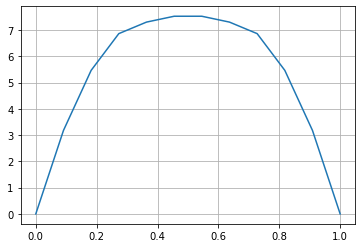

In [31]:
plt.plot(x,uSlice)
plt.grid()

In [32]:
def FDM(n,h):

    M = np.zeros([n,n])

    M[0][0] = 1

    for i in range(1,n-1):
        M[i][i-1] = -2
        M[i][i] = 4
        M[i][i+1] = -2

    M[n-1][n-1] = 1


    M *= 1./(2.*h*h)

    return M

In [52]:
MFDM = FDM(5,1)
MFDM

array([[ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [-1. ,  2. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. , -1. ,  2. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. , -1. ,  2. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. , -1. ,  2. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. , -1. ,  2. , -1. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -1. ,  2. , -1. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  2. , -1. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  2. , -1. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  2. , -1. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  2. ,
        -1. ],
       [ 0. ,  0. ,  

In [53]:
fFDM = np.zeros([5])

In [61]:
for i in range(1,5):
    fFDM[i] =  8/9

In [62]:
fFDM

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.        ])

In [63]:
uFDM = np.linalg.solve(MFDM,fFDM)

In [64]:
uFDM

array([-0.        ,  4.44444444,  8.        , 10.66666667, 12.44444444,
       13.33333333, 13.33333333, 12.44444444, 10.66666667,  8.        ,
        4.44444444,  0.        ])

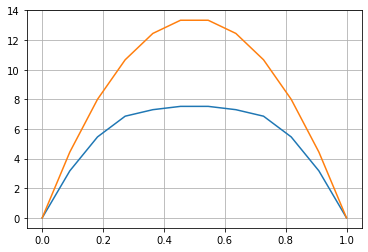

In [65]:
plt.plot(x,uSlice)
plt.plot(x,uFDM)
plt.grid()